In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.metrics import r2_score
%matplotlib inline

### Preprocessing

In [63]:
df = pd.read_csv('1632300362534233.csv')
df

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33
...,...,...,...,...,...,...,...,...
3474,86,2,True,True,True,Southern Janatabad,3.500000e+09,116666.67
3475,83,2,True,True,True,Niavaran,6.800000e+09,226666.67
3476,75,2,False,False,False,Parand,3.650000e+08,12166.67
3477,105,2,True,True,True,Dorous,5.600000e+09,186666.67


In [64]:
# drop NaN and Address column and Price column
df = df.dropna()
df = df.drop(['Address','Price'], axis=1)

# LabelEncoding Parking
P_encoder = LabelEncoder().fit(df['Parking'].unique())
df['Parking'] = P_encoder.transform(df['Parking'])

# LabelEncoding Warehouse
W_encoder = LabelEncoder().fit(df['Warehouse'].unique())
df['Warehouse'] = W_encoder.transform(df['Warehouse'])

# LabelEncoding Elevator
E_encoder = LabelEncoder().fit(df['Elevator'].unique())
df['Elevator'] = E_encoder.transform(df['Elevator'])

# drop outlier values of Area
df = df.sort_values(by='Area')
df = df.iloc[6:,:]
df['Area'] = df['Area'].astype('float')


df = df.rename(columns={'Price(USD)':'price'})
df.head(10)

,Area,Room,Parking,Warehouse,Elevator,price
899,100.0,2,1,1,1,126666.67
1846,100.0,2,1,1,1,76666.67
900,100.0,2,1,1,1,116666.67
1130,100.0,2,0,1,1,110000.00
904,100.0,2,1,1,1,120000.00
545,100.0,2,1,1,1,33333.33
2821,100.0,2,1,1,1,86666.67
1128,100.0,2,1,1,1,103333.33
623,100.0,2,1,1,1,183333.33
2384,100.0,2,0,0,0,40000.00


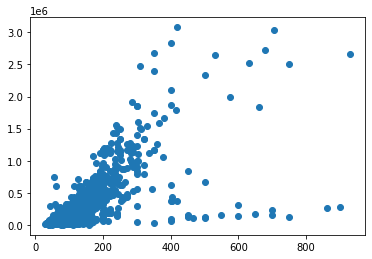

In [65]:
plt.scatter(df['Area'], df['price'])

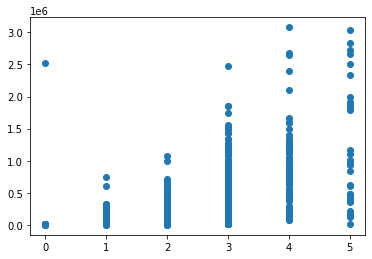

In [66]:
plt.scatter(df['Room'], df['price'])

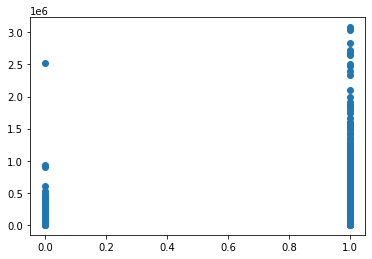

In [67]:
plt.scatter(df['Parking'], df['price'])

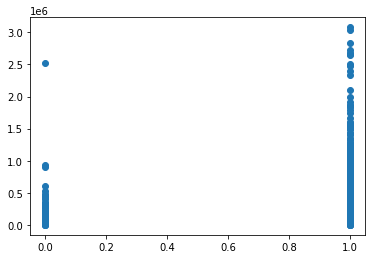

In [68]:
plt.scatter(df['Warehouse'], df['price'])

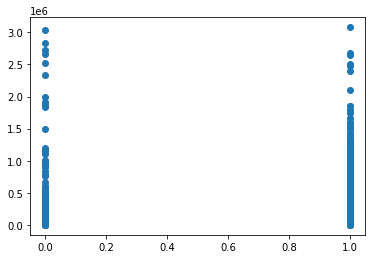

In [69]:
plt.scatter(df['Elevator'], df['price'])

### Model

#### Simple Linear regression

r2_score train: 0.5552170299403943
r2_score test: 0.3325304913211211


Text(0, 0.5, 'price(USD)')

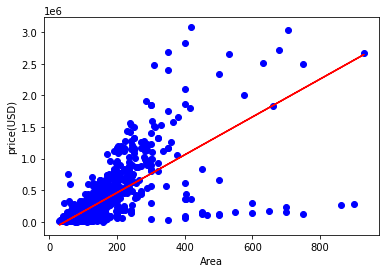

In [70]:
# split X,y
X = df[['Area']].values
y = df[['price']].values

# split train,test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# create model
model = linear_model.LinearRegression().fit(X_train, y_train)

# Evaluate with r2_score
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)
r2_score_train = r2_score(y_train, y_hat_train)
r2_score_test = r2_score(y_test, y_hat_test)
print('r2_score train:',r2_score_train)
print('r2_score test:',r2_score_test)

# plot
plt.scatter(df.Area, df.price,  color='blue')
plt.plot(X_train, model.coef_[0][0]*X_train + model.intercept_[0], '-r')
plt.xlabel("Area")
plt.ylabel("price(USD)")

#### Polynomial Regression

In [71]:
# X,y
Xp = df[['Area','Room','Parking','Warehouse','Elevator']].values
yp = df[['price']].values

# normalize Xp
scaler = StandardScaler().fit(Xp)
Xp = scaler.transform(Xp)

# split train,test
X_train, X_test, y_train, y_test = train_test_split(Xp, yp, test_size=0.2, random_state=2)

# polynomialFeatures
poly = PolynomialFeatures(degree=3)
train_x_poly = poly.fit_transform(X_train)
test_x_poly = poly.fit_transform(X_test)

# create Linear model
p_model = linear_model.LinearRegression().fit(train_x_poly, y_train)

# Evaluate with r2_score
y_hat_train = p_model.predict(train_x_poly)
y_hat_test = p_model.predict(test_x_poly)
r2_score_train = r2_score(y_train, y_hat_train)
r2_score_test = r2_score(y_test, y_hat_test)
print('r2_score train:',r2_score_train)
print('r2_score test:',r2_score_test)

r2_score train: 0.7400860192402436
r2_score test: 0.6477817306446964
